In [1]:
### Benjamin Tollison ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sympy as sp
from IPython.display import Latex, Math, display
from sympy import (
    Eq,
    Function,
    Matrix,
    cos,
    cosh,
    exp,
    integrate,
    lambdify,
    pi,
    sin,
    sinh,
    symbols,
)
from decimal import Decimal
from sympy.solvers.pde import pdsolve
from sympy.solvers.solveset import linsolve
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
def format_scientific(number:float):
    a = '%E' % number
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]
deg2rad = np.pi/180
rad2deg = 180/np.pi

In [2]:
thrust = 10*(800-300) + 4*(80-20)*1000
displayVariableWithUnits('T',thrust,'N')

<IPython.core.display.Math object>

### 3)

In [3]:
T01 = 288 # K
P01 = 101325 # Pa
compressor_ratio = 10.3
compressor_isentropic_efficiency = 0.87
mechanical_efficiency = 0.99
combustion_pressure_loss = 0.05
LHV_kerosene = 41 # J/kg
combustion_efficiency = 0.99
T03 = 1190 # K
turbine_efficiency = 0.88
T4 = 873 # K
massflow_rate = 108 # kg/s
cp_air = 1005 # J/kg-K
cp_gas = 1150 # J/kg-K
cycle_dict = {
  '1':{'T0': T01,'P0':P01}
}
gamma_air = 1.4
gamma_gas = 1.33
display(pd.DataFrame(cycle_dict))

,1
T0,288
P0,101325


In [4]:
P02 = compressor_ratio*P01
T02 = T01 * (1 + (1/compressor_isentropic_efficiency)*(compressor_ratio**((gamma_air-1)/gamma_air) - 1))
displayVariableWithUnits('P_{02}',P02,'Pa')
displayVariableWithUnits('T_{02}',T02,'K')
compressor_work = cp_air*(T02-T01)
displayVariableWithUnits('W_c',compressor_work,'J')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
turbine_work = cp_gas*(T03-T4)/mechanical_efficiency
displayVariableWithUnits('W_T',turbine_work,'J')

<IPython.core.display.Math object>

In [6]:
shaft_power = massflow_rate*(turbine_work-compressor_work)
displayVariableWithUnits('P_{shaft}',shaft_power,'W')

<IPython.core.display.Math object>

In [7]:
S01 = 6.6608
S02 = cp_air*np.log(T02/T01)/1000 - .287*np.log(compressor_ratio) + S01
displayVariableWithUnits('s_{02}',round(S02,4),'\\frac{kJ}{kgK}')
S03 = ((8.5067-8.4956)/(1193.16-1183.16))*(1190-1183.16) + 8.4956
displayVariableWithUnits('s_{03}',round(S03,4),'\\frac{kJ}{kgK}')
S04 = cp_gas*np.log(T4/T03)/1000 - .287*np.log(P01/(P02*0.95)) + S03
displayVariableWithUnits('s_{04}',round(S04,4),'\\frac{kJ}{kgK}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

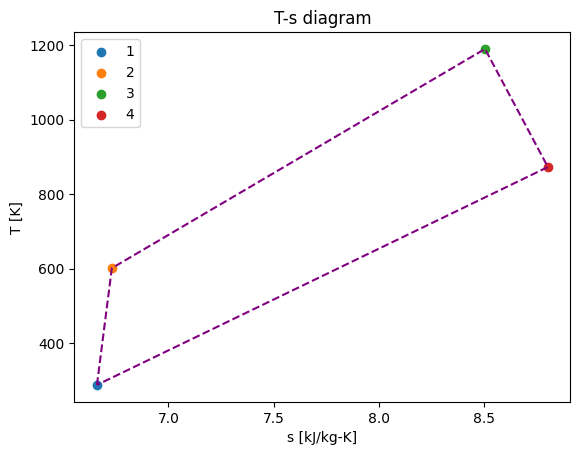

In [8]:
temperature_values = [T01,T02,T03,T4,T01]
entropy_values = [S01,S02,S03,S04,S01]
for i in range(len(temperature_values)-1):
  plt.scatter(entropy_values[i],temperature_values[i],label=f'{i+1}')
plt.plot(entropy_values,temperature_values,label=None,color='purple',linestyle='--')
plt.xlabel('s [kJ/kg-K]')
plt.ylabel('T [K]')
plt.legend()
plt.title("T-s diagram")
plt.show()

In [9]:
displayVariableWithUnits('\\Delta{t_{c}}',round(T03-T02,4),'K')
fuel_ratio_ideal = 0.014
air_to_fuel = fuel_ratio_ideal**-1
displayVariable('f^{-1}',air_to_fuel)

<IPython.core.display.Math object>

<IPython.core.display.Math object>